# 1. Let us consider a problem

In [14]:
import numpy as np

A = np.array([[2,-1,0,0,0,0],[-1,2,-1,0,0,0],[0,-1,2,-1,0,0],
            [0,0,-1,2,-1,0],[0,0,0,-1,2,-1],[0,0,0,0,-1,2]], dtype=float)
b = np.array([1,1,1,1,1,1], dtype=float)
x0 = np.zeros_like(b)

x_exact = np.linalg.solve(A, b)

# 1-a) Jacobi Method

In [15]:
def jacobi(A, b, x0, x_exact, tol=1e-4, max_iterations=1000):
    n = len(b)
    x = x0.copy()
    results = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        error = np.linalg.norm(x_new - x_exact, ord=np.inf)
        if k == 0:
            ratio = error / np.linalg.norm(x0 - x_exact, ord=np.inf)
            results.append((k+1, error, ratio))
        else:
            ratio = error / results[-1][1]
            results.append((k+1, error, ratio))
        if error < tol:
            return results
        x = x_new
    raise ValueError("Jacobi method did not converge")

results_jacobi = jacobi(A, b, x0, x_exact)
print("Jacobi 방법:")
print("n\t|X_{n} - X|_{inf}\t|X_{n} - X|_{inf}/|X_{n-1} - X|_{inf}")
for res in results_jacobi:
    print(f"{res[0]}\t{res[1]:.6f}\t\t{res[2]:.6f}")

Jacobi 방법:
n	|X_{n} - X|_{inf}	|X_{n} - X|_{inf}/|X_{n-1} - X|_{inf}
1	5.500000		0.916667
2	5.000000		0.909091
3	4.500000		0.900000
4	4.062500		0.902778
5	3.656250		0.900000
6	3.296875		0.901709
7	2.968750		0.900474
8	2.675781		0.901316
9	2.410156		0.900730
10	2.171875		0.901135
11	1.956543		0.900854
12	1.762939		0.901048
13	1.588257		0.900914
14	1.431030		0.901007
15	1.289276		0.900943
16	1.161621		0.900987
17	1.046570		0.900956
18	0.942936		0.900978
19	0.849550		0.900963
20	0.765422		0.900973
21	0.689619		0.900966
22	0.621327		0.900971
23	0.559795		0.900967
24	0.504359		0.900970
25	0.454411		0.900968
26	0.409410		0.900969
27	0.368866		0.900969
28	0.332337		0.900969
29	0.299425		0.900969
30	0.269773		0.900969
31	0.243057		0.900969
32	0.218987		0.900969
33	0.197300		0.900969
34	0.177761		0.900969
35	0.160157		0.900969
36	0.144297		0.900969
37	0.130007		0.900969
38	0.117132		0.900969
39	0.105532		0.900969
40	0.095081		0.900969
41	0.085665		0.900969
42	0.077182		0.900969
43	0.069538		0.9

# 1-b) Gauss-Seidel Method

In [16]:
def gauss_seidel(A, b, x0, x_exact, tol=1e-4, max_iterations=1000):
    n = len(b)
    x = x0.copy()
    results = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        error = np.linalg.norm(x_new - x_exact, ord=np.inf)
        if k == 0:
            ratio = error / np.linalg.norm(x0 - x_exact, ord=np.inf)
            results.append((k+1, error, ratio))
        else:
            ratio = error / results[-1][1]
            results.append((k+1, error, ratio))
        if error < tol:
            return results
        x = x_new
    raise ValueError("Gauss-Seidel method did not converge")

results_gauss_seidel = gauss_seidel(A, b, x0, x_exact)
print("\nGauss-Seidel 방법:")
print("n\t|X_{n} - X|_{inf}\t|X_{n} - X|_{inf}/|X_{n-1} - X|_{inf}")
for res in results_gauss_seidel:
    print(f"{res[0]}\t{res[1]:.6f}\t\t{res[2]:.6f}")


Gauss-Seidel 방법:
n	|X_{n} - X|_{inf}	|X_{n} - X|_{inf}/|X_{n-1} - X|_{inf}
1	5.125000		0.854167
2	4.343750		0.847561
3	3.632812		0.836331
4	2.976562		0.819355
5	2.426270		0.815125
6	1.973389		0.813343
7	1.603394		0.812508
8	1.302132		0.812110
9	1.057226		0.811920
10	0.858286		0.811829
11	0.696744		0.811785
12	0.565592		0.811764
13	0.459121		0.811754
14	0.372691		0.811749
15	0.302531		0.811747
16	0.245578		0.811746
17	0.199347		0.811745
18	0.161819		0.811745
19	0.131356		0.811745
20	0.106627		0.811745
21	0.086554		0.811745
22	0.070260		0.811745
23	0.057033		0.811745
24	0.046296		0.811745
25	0.037581		0.811745
26	0.030506		0.811745
27	0.024763		0.811745
28	0.020101		0.811745
29	0.016317		0.811745
30	0.013245		0.811745
31	0.010752		0.811745
32	0.008728		0.811745
33	0.007085		0.811745
34	0.005751		0.811745
35	0.004668		0.811745
36	0.003790		0.811745
37	0.003076		0.811745
38	0.002497		0.811745
39	0.002027		0.811745
40	0.001645		0.811745
41	0.001336		0.811745
42	0.001084		0.811745
43	0.0008

# 1-c) SOR Method

In [17]:
def sor(A, b, x0, x_exact, omega=1.4, tol=1e-4, max_iterations=1000):
    n = len(b)
    x = x0.copy()
    results = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - s1 - s2) / A[i, i]
        error = np.linalg.norm(x_new - x_exact, ord=np.inf)
        if k == 0:
            ratio = error / np.linalg.norm(x0 - x_exact, ord=np.inf)
            results.append((k+1, error, ratio))
        else:
            ratio = error / results[-1][1]
            results.append((k+1, error, ratio))
        if error < tol:
            return results
        x = x_new
    raise ValueError("SOR method did not converge")

results_sor = sor(A, b, x0, x_exact, omega=1.4)
print("\nSOR 방법:")
print("n\t|X_{n} - X|_{inf}\t|X_{n} - X|_{inf}/|X_{n-1} - X|_{inf}")
for res in results_sor:
    print(f"{res[0]}\t{res[1]:.6f}\t\t{res[2]:.6f}")


SOR 방법:
n	|X_{n} - X|_{inf}	|X_{n} - X|_{inf}/|X_{n-1} - X|_{inf}
1	4.467000		0.744500
2	3.150090		0.705191
3	1.977960		0.627906
4	1.203700		0.608556
5	0.503283		0.418114
6	0.214265		0.425734
7	0.108455		0.506174
8	0.047381		0.436873
9	0.018809		0.396969
10	0.007170		0.381180
11	0.003204		0.446839
12	0.001292		0.403190
13	0.000441		0.341263
14	0.000165		0.373772
15	0.000064		0.388948


# 2. Solve the ordinary differential equation

# 2-a)Forward Euler Method

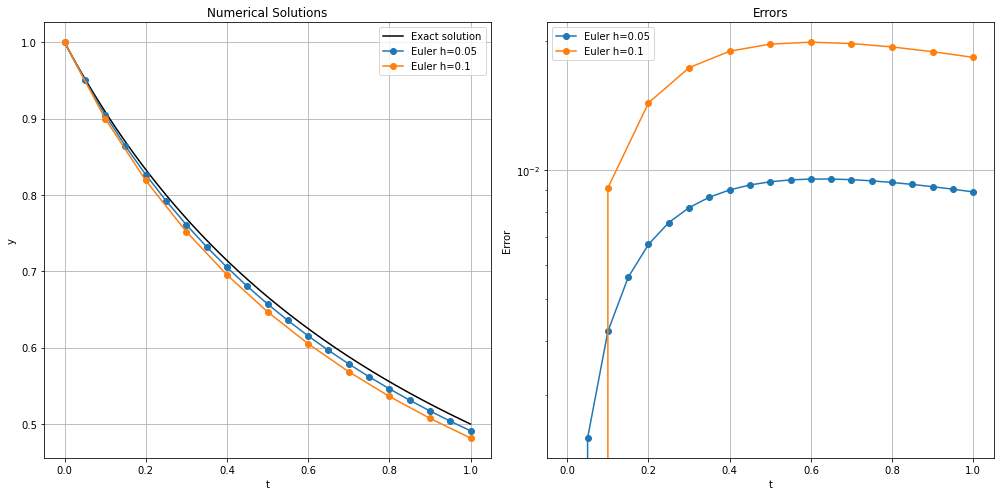

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, y0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    
    return t_values, y_values

def f(t, y):
    return -y**2

y0 = 1
t0 = 0
t_end = 1

h_values = [0.05, 0.1]

def exact_solution(t):
    return 1 / (t + 1)

euler_solutions = {}
for h in h_values:
    t, y = euler_method(f, y0, t0, t_end, h)
    euler_solutions[h] = (t, y)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
t_exact = np.linspace(t0, t_end, 500)
y_exact = exact_solution(t_exact)
plt.plot(t_exact, y_exact, 'k-', label='Exact solution')

for h in h_values:
    t, y = euler_solutions[h]
    plt.plot(t, y, 'o-', label=f'Euler h={h}')
    
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for h in h_values:
    t, y = euler_solutions[h]
    error = np.abs(y - exact_solution(t))
    plt.plot(t, error, 'o-', label=f'Euler h={h}')
    
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Errors')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 2-b)Mid-point Method

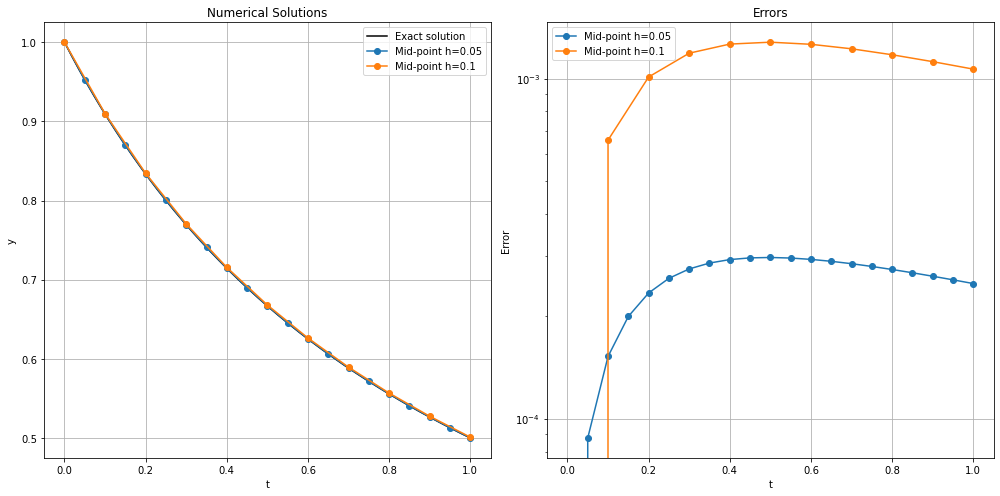

In [19]:
def midpoint_method(f, y0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        z = y_values[i - 1] + (h / 2) * f(t_values[i - 1], y_values[i - 1])
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1] + h / 2, z)
    
    return t_values, y_values

midpoint_solutions = {}
for h in h_values:
    t, y = midpoint_method(f, y0, t0, t_end, h)
    midpoint_solutions[h] = (t, y)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_exact, y_exact, 'k-', label='Exact solution')

for h in h_values:
    t, y = midpoint_solutions[h]
    plt.plot(t, y, 'o-', label=f'Mid-point h={h}')
    
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical Solutions')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for h in h_values:
    t, y = midpoint_solutions[h]
    error = np.abs(y - exact_solution(t))
    plt.plot(t, error, 'o-', label=f'Mid-point h={h}')
    
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Errors')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()